<font size=6> Generic Customer Churn Prediction </font>

### Executive Summary

*   To better understand which customer attributes that play big role in determining potential churn, it has been identified from initial EDA result that there are 3 features that differenciates between existing customer and customer who left (churn): Age, Tenure, Balance
*   A Neural Network model has been selected based on overall Recall score, as well as comparison peformance between train and validation data. The selected model possess 79% recall score and 0.42 loss score with only 2% recall score difference between train and validation data. When the model is applied on to the test data, the recall score drop only by 4%. This gives technical assurance that the model is able to to generalize well for unseen data.
*   From the selected Neural Network model, it has been identified that the most important features to determine churn are: Number of Products, Age, Balance. When compared to EDA findings, apparently feature Tenure is considered a neutral factor, but it was difficult to see if Number of Products plays an important part, as the distribution looks identical.






### Business Problem Overview and Solution Approach

*   To identify important features of customers who are likely to close down their account, and to have some idea how the features impact on the attrition, based on the distribution.
*   Solution Approach: from the model, IT to generate monthly report of customers that are likely to close down their account. The report is to be provided to customer relation department for further actions. The model needs to be re-trained monthly in order to take in recent trends.
*   Business Approach: Targetted intervention efforts to be focused to customers who are likely to close down the account. The Customer relation department needs to offer specific campaign based on the characteristics of the customer, in order to retain these high-risk customers.

### Actionable Insights and Recommendation

Set up a session between IT and the respective departments to align the understanding:


*   The model was developed to improve our prediction accuracy for customer attrition, based on Neural Network. IT to explain basic understanding about Neural Network concepts: Imagine a Smart team which consists of Input Layer (Data Entry Assistants), Hidden Layers (Analysis Assistants) and Output Layer (Decision-Making Assistants). Together they work together to solve a problem.
*   Identify customers at high risk of churn based on predictions of the final Neural Network model.
*   Key Drivers - these are the Top 3 features that contribute to customer churn (sorted by importance): Number of Products : 0.11,  Age : 0.08, Balance : 0.03




**Recommendations for IT side:**
Given more time, IT may explore following options:
- adding more hidden layers and adjusting number of neurons for each layer
- adjusting batch size, #epoch, learning rate and dropout rate
- implementing batch normalization and L1/L2 regularization
- exploring other activation function, such as ELU and LeakyReLU

Should the respective department feel comfortable with the model, IT would need to automate the pipeline of the Data ETL (Extract, Transform, Load) to feed the data into the model. A report need to be generated monthly to provide information of customers who are identified as potential churn.

**Recommendations for the Business side:**
- Targetted interventions: with the monthly-generated report of potential attrited customer, the customer relation department may try to foster better relation with the identified customer, for example: by providing some promotional campaign - cash advance with low interest, annual fee waiver, extra cashback, and so on. The bank would have specific campaign targetted for each segment of customers.
- After having performed the actions, evaluate the attrition rate each month to see if the rate is going down.


### Objective

To  build a neural network based classifier that can determine whether a customer will leave the bank.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* IsActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
    - 0 = No ( Customer did not leave the bank )
    - 1 = Yes ( Customer left the bank )

## Technical Parts begin here

In [ ]:
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you pre

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import time

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## Loading the dataset

In [ ]:
ds = pd.read_csv("Churn.csv")

## Data Overview and Preparation

In [ ]:
ds.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Understand the shape of the dataset

In [ ]:
ds.shape #10000 rows and 14 columns

(10000, 14)

### Check the data types of the columns for the dataset

In [ ]:
ds.info()
'''
Note by Stevan:

#Ensure the data types are correct, as they will impact the memory usage.
Strings will be captured as object. If the columns represent category, needs to convert the column to category.
If there is any specific order, use: CategoricalDtype(categories=['low', 'medium', 'high'], ordered=True)
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking the Statistical Summary

In [ ]:
ds.describe().T

'''
Note by Stevan:

Can check for skewness for the columns. if the absolute value of skewness is too big, perhaps there are outliers to treat!
df.skew()
Positive skew: The tail on the right side is longer or fatter than the left side. Most values are concentrated on the left.
Negative skew: The tail on the left side is longer or fatter than the right side. Most values are concentrated on the right.
Zero skew: The data is symmetrically distributed.
'''

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Checking for Missing Values

In [ ]:
ds.isna().sum()

'''Note by Stevan:
- isna() and isnull() are the same

then try to understand which treatment is suitable for the column:

# Option 1: Drop rows with any missing values
df_dropped = df.dropna()
# Option 2: Fill missing values with a specific value
df_filled = df.fillna({'Column1': 0, 'Column2': 'Unknown'})
# Option 3: Fill missing values with the column mean (numerical column)
df['Column1'] = df['Column1'].fillna(df['Column1'].mean())


The fillna() method in pandas provides several options to handle missing values in a DataFrame or Series. Here's a breakdown of the key parameters and their uses:

a. value: Replace missing values with a specific value.
Example: df.fillna(value=0) replaces all missing values with 0.
b. method:
'ffill' (or 'pad'): Propagates the last valid value forward.
'bfill' (or 'backfill'): Uses the next valid value to fill gaps.
Example: df.fillna(method='ffill').
c. axis: Specifies the axis along which to fill missing values:
0 or 'index': Fill along rows.
1 or 'columns': Fill along columns.
Example: df.fillna(value=0, axis=1).
d. inplace: If True, modifies the original DataFrame/Series. If False, returns a new object with the changes.
Example: df.fillna(value=0, inplace=True).
e. limit: Specifies the maximum number of consecutive NaN values to fill.
Example: df.fillna(method='ffill', limit=2) fills up to 2 consecutive missing values.
f. downcast: Attempts to downcast the filled data to a specific type (e.g., float to int).
Example: df.fillna(value=0, downcast='infer').
'''

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
ds.duplicated().sum()
'''
Note by Stevan:

How to treat duplicated columns
- Drop Duplicates: Remove duplicate rows using drop_duplicates().
- Keep ('first'/'last'/ False) :df_cleaned = df.drop_duplicates(keep='first')
- Check duplicate only on certain columns : df.drop_duplicates(subset=['Column1', 'Column2'])
- modify the original dataframe : df.drop_duplicates(inplace=True)
'''

0

### Checking for unique values for each of the column

In [ ]:
ds.nunique()

'''
Note by Stevan:

Try to make sense the count of unique values.
Example: if the Gender has let's say 10 unique values.
use df['Gender'].value_counts() to see the values. Perhaps there is some unstandardized data "Male", "male", "M"

Then define accordingly for replacement
male_variations = ['Male', 'male', ' male', ' M']
female_variations = ['Female', 'female', ' F']
df['Gender'] = df['Gender'].replace(male_variations, 'M').replace(female_variations, 'F')

If the column ended up only with 2 values like M and F, can convert the column to Boolean (1 = M, 2 = F)
df['Is_Male'] = df['Gender'] == 'M'
'''

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [ ]:
#Remove unnecessary columns (values are unique, or not meaningful for analysis)
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(5, 4), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    g = sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    #xlabels = ['{:,d}'.format(int(x)) + 'K' for x in g.get_xticks()/1000]
    #g.set_xticklabels(xlabels)

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=0, fontsize=11)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=11,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

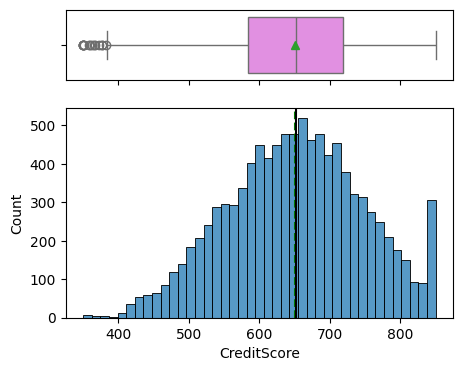

In [ ]:
histogram_boxplot(ds,'CreditScore')
#The distribution for Credit Score is having outliers on the left end - and high values at the right end

#### Observations on Age

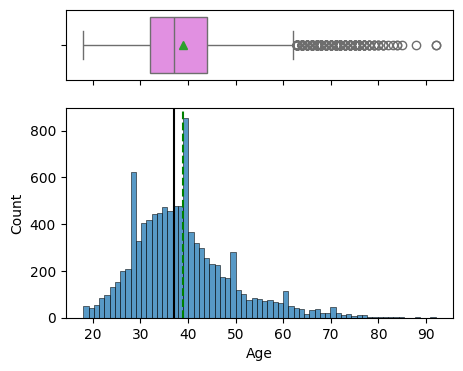

In [ ]:
histogram_boxplot(ds,'Age')
#the distribution for Age is right skewed.

#### Observations on Balance

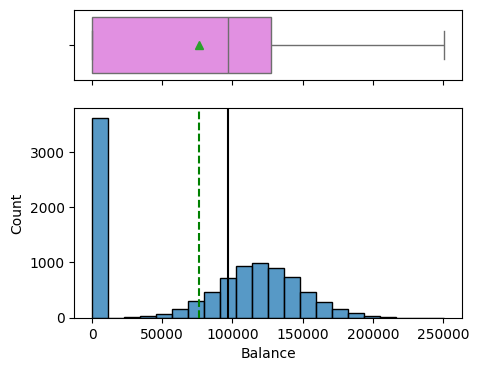

In [ ]:
histogram_boxplot(ds,"Balance")

#### Observations on Estimated Salary

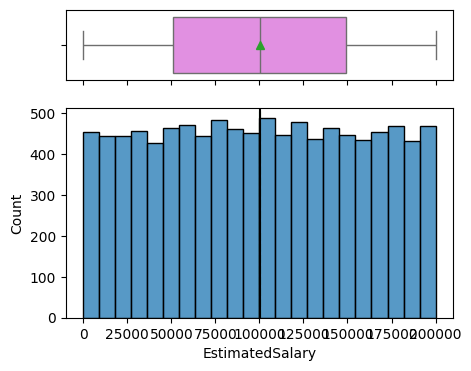

In [ ]:
histogram_boxplot(ds,"EstimatedSalary")
#looks very equally distribued

#### Observations on Exited

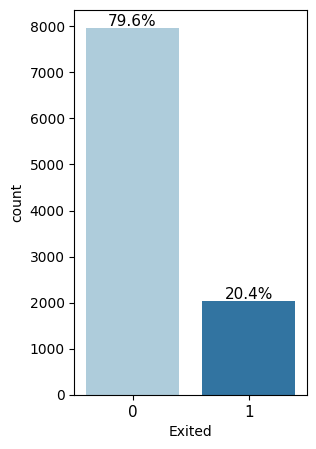

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

#The number of samples for existing customer is 4 times the number of samples of customers who left
#--> This imbalance may affect the model, as it may incline towards to existing customers.

#### Observations on Geography

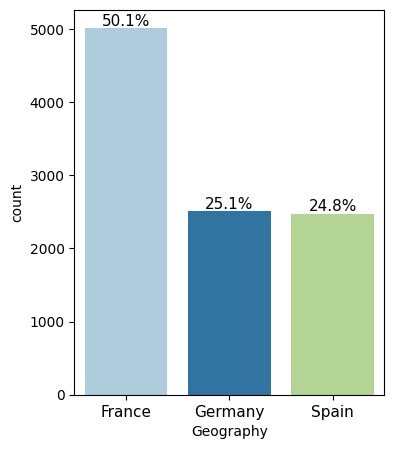

In [ ]:
labeled_barplot(ds, "Geography", perc=True)

#### Observations on Gender

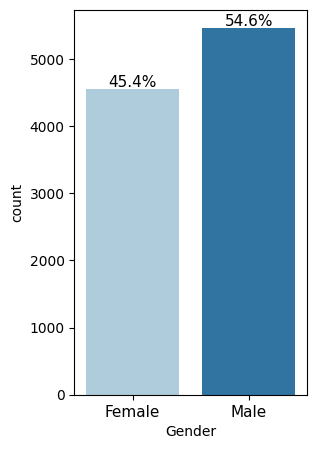

In [ ]:
labeled_barplot(ds, "Gender", perc=True) #still relatively equal

#### Observations on Tenure

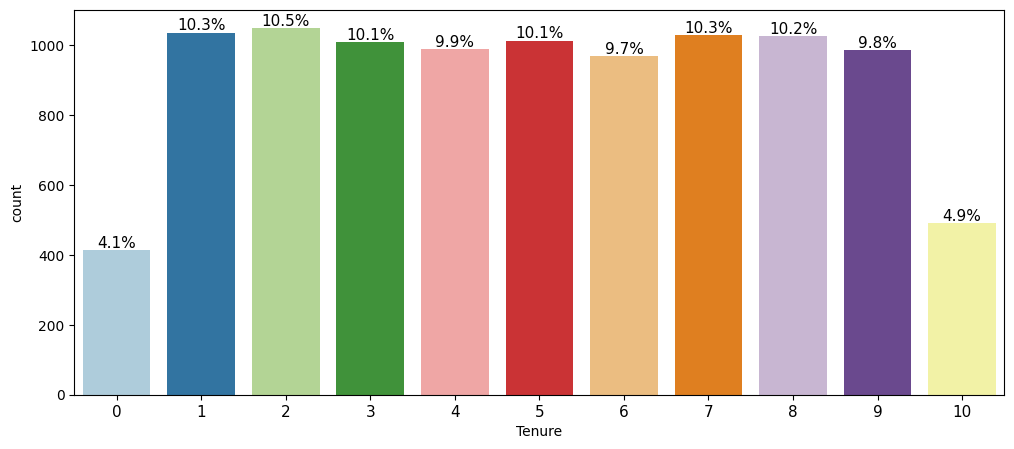

In [ ]:
labeled_barplot(ds, "Tenure", perc=True)

#### Observations on Number of Products

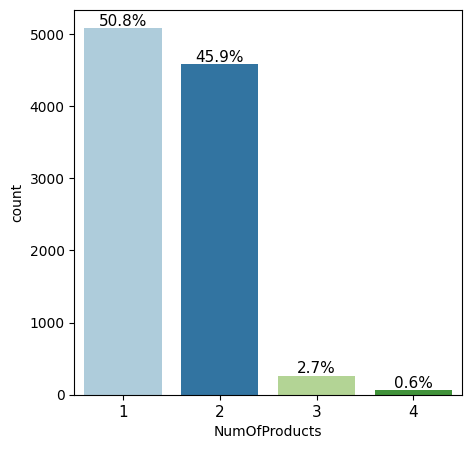

In [ ]:
labeled_barplot(ds, "NumOfProducts", perc=True)

#### Observations on Has Credit Card

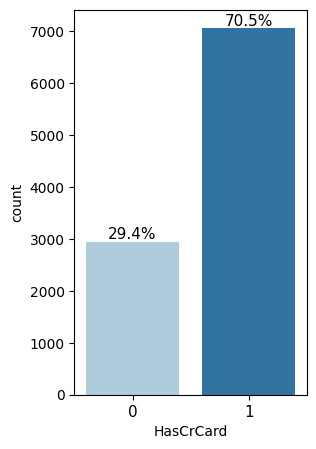

In [ ]:
labeled_barplot(ds, "HasCrCard", perc=True)

#### Observations on Is Active Member

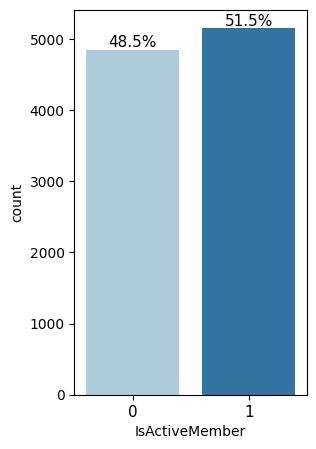

In [ ]:
labeled_barplot(ds, "IsActiveMember", perc=True)   #still equal

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 4))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    plt.xticks(rotation=0, fontsize=11)
    plt.show()

#### Correlation plot

In [ ]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

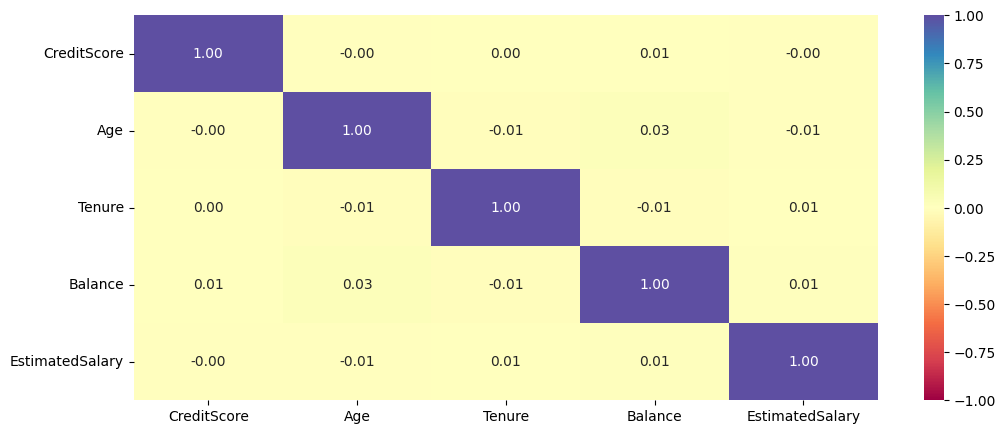

In [ ]:
plt.figure(figsize=(12, 5))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()
'''
Note by Stevan:
Apparently not a single pair of features having high correlation
If there are some pairs with high correlations value, we may consider dropping one of the columns from each pair.

However, one thing that is dangerous is to know if a column's value depends on combination of multiple columns.
Need to check this based on data, or consult to subject matter expert.
'''

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


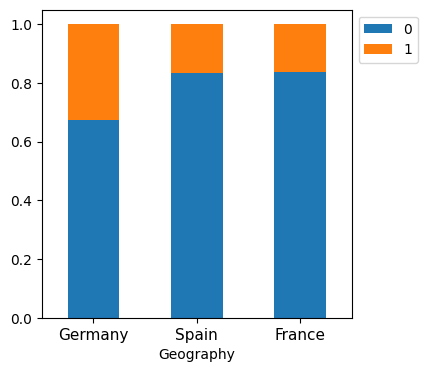

In [ ]:
stacked_barplot(ds, "Geography", "Exited" ) #Germany has more churn customer

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


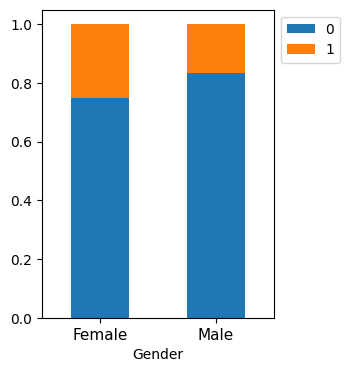

In [ ]:
stacked_barplot(ds, "Gender", "Exited")

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


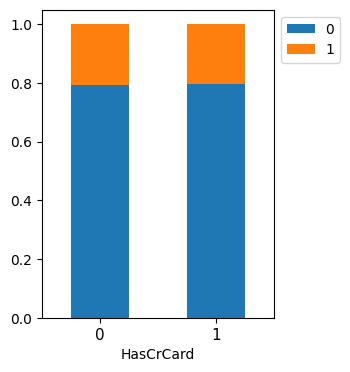

In [ ]:
stacked_barplot(ds, "HasCrCard", "Exited")

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


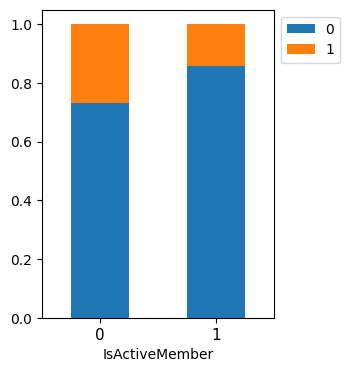

In [ ]:
stacked_barplot(ds, "IsActiveMember", "Exited")

#### Exited Vs Credit Score

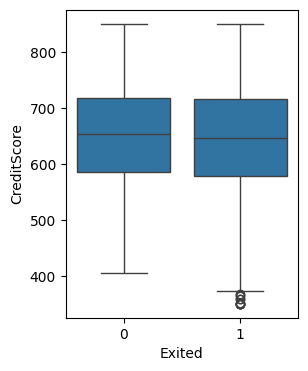

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Exited Vs Age

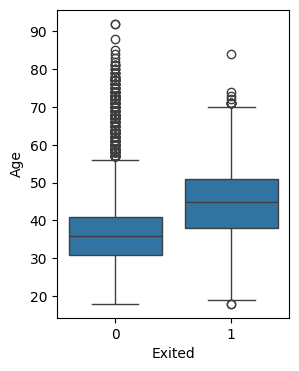

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()
#looks totally different. Churn customer tend to be older.

#### Exited Vs Tenure

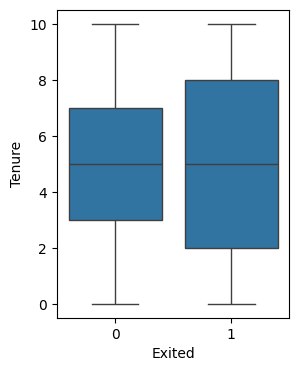

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()
#Customer who churn also has wider IQR

#### Exited Vs Balance

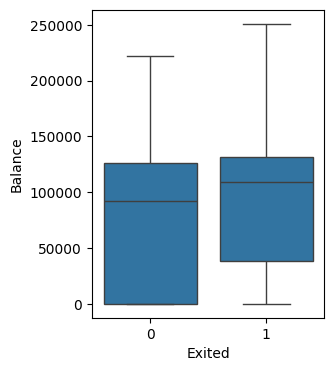

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()
#Customer who churn seem to have higher balance

#### Exited Vs Number of Products

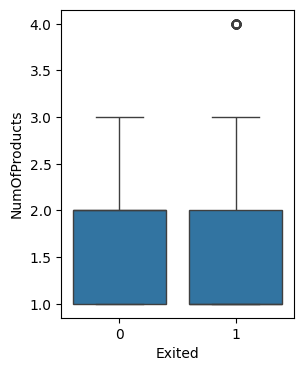

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

#### Exited Vs Estimated Salary

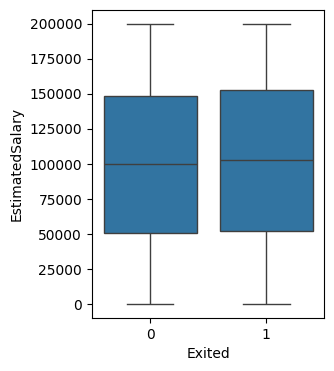

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
ds = ds.astype(float)
ds.head()
#this is called one-hot-encoding for all non-numerical columns.

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


### Train-validation-test Split

Split the data into 3 category, with following ratio:
- Train = 60%
- Validation = 20%
- Test = 20%

In [ ]:
X = ds.drop(['Exited'],axis=1) #Predictors
y = ds['Exited'] #Outcome

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,stratify=y,shuffle = True)
#Use a specific number of random_state for reproducibility, in this case 1

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.25, random_state = 1,stratify=y_large, shuffle = True)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

(6000,) (2000,) (2000,)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [ ]:
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

'''
Note by Stevan:

The purpose of using StandardScaler is to standardize features by removing the mean and scaling them to unit variance.
This ensures that the data is centered around zero and has a standard deviation of one.

fit_transform = Combines the fit() and transform() methods.
It calculates the mean and standard deviation (using fit()) and then applies the transformation (using transform()) to the same dataset.

Fit only applies to Train dataset.
'''

## Model Evaluation Criterion

## !! **IMPORTANT** to understand which matrix is most relevant for the case



True Positive (TP) =
Predicting a customer will leave the bank and the customer left.

True Negative (TN) =
Predicting a customer will NOT leave the bank and the customer does NOT leave the bank.

False Positive (FP) =
Predicting a customer will leave the bank and the customer does NOT leave.

False Negative (FN) =
Predicting a customer will NOT leave the bank and the customer left (This is the most important case for the bank.)


**Accuracy** = (TP + TN) / (TP + TN + FP + FN)

**Precision** = TP / (TP + FP)

**Recall** = TP / (TP + FN)

**F1 Score** = (2 * Precision * Recall) / (Precision + Recall)

In order to reduce loss, the bank would need to focus on cases of True Positive and False Negative.

And therefore the focus is on increasing Recall score, that the model should be able to:
- maximize true positives, and
- minimize the false negatives

So that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.



**ACTIVATION FUNCTION**

The ReLU (Rectified Linear Unit) activation function is widely used in neural networks because of its simplicity and efficiency. It outputs the input directly if it's positive; otherwise, it outputs zero. Here are some common variations of ReLU:



1.   Standard ReLU: : f(x) = max(0, x)

Outputs zero for negative inputs and the input itself for positive values.

2.   Leaky ReLU:  f(x) = x if x > 0, else alpha * x

Allows a small, non-zero gradient for negative inputs (controlled by alpha), which helps mitigate the "dying ReLU" problem.

3. Parametric ReLU (PReLU):

Similar to Leaky ReLU, but the slope for negative inputs (alpha) is learned during training.

4. Exponential Linear Unit (ELU): f(x) = x if x > 0, else alpha * (exp(x) - 1)

Smoothly transitions for negative inputs, which can improve learning.

5. Scaled Exponential Linear Unit (SELU):  

A scaled version of ELU that helps with self-normalizing neural networks.

6. Thresholded ReLU:

Outputs zero for inputs below a certain threshold instead of zero.

Create a function for plotting the confusion matrix



In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)

    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(5, 2.5))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

In [ ]:
num_neuron_hl_1 = 8
num_neuron_hl_2 = num_neuron_hl_1 * 2
num_neuron_hl_3 = num_neuron_hl_2 * 2
num_neuron_hl_4 = num_neuron_hl_3 * 2
num_neuron_hl_5 = num_neuron_hl_4 * 2
num_neuron_hl_6 = num_neuron_hl_5 * 2
num_neuron_hl_7 = num_neuron_hl_6 * 2
num_neuron_hl_8 = num_neuron_hl_7 * 2

batch_size = 6000 #add by Stevan
epochs = 10 #add by Stevan

## Neural Network with SGD Optimizer (Initial Base Model)

In [ ]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#add by Stevan - whole cell
#Encoding the target variable
num_classes = 1 #added by Stevan

In [ ]:
#Initializing the neural network
model_0 = Sequential()
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
model_0.add(Dense(32, activation='relu'))
model_0.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = tf.keras.optimizers.SGD(0.001)

metric = 'recall'
#metric = 'accuracy'
#metric = keras.metrics.Recall()
#metric = keras.metrics.Precision()
#metric = keras.metrics.F1Score()

In [ ]:
##compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the ANN
start = time.time()

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=6000,
    validation_data=(X_val,y_val),
    epochs=10,
    verbose=1
)

end = time.time()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.6555 - recall: 0.2021 - val_loss: 0.6522 - val_recall: 0.1863
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 0.6550 - recall: 0.2013 - val_loss: 0.6517 - val_recall: 0.1814
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.6545 - recall: 0.1980 - val_loss: 0.6512 - val_recall: 0.1789
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 0.6540 - recall: 0.1948 - val_loss: 0.6507 - val_recall: 0.1716
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - loss: 0.6535 - recall: 0.1915 - val_loss: 0.6502 - val_recall: 0.1691
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - loss: 0.6530 - recall: 0.1899 - val_loss: 0.6497 - val_recall: 0.1618
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 0.6525 - recall: 0.1874 - val_loss: 0.6492 - val_recall: 0.1593
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 0.6520 - recall: 0.1858 - val_loss: 0.6487 - val_recall: 0.1593
Epoch 9/10
1/1 ━━━━━━━━━━━━

**Loss function**

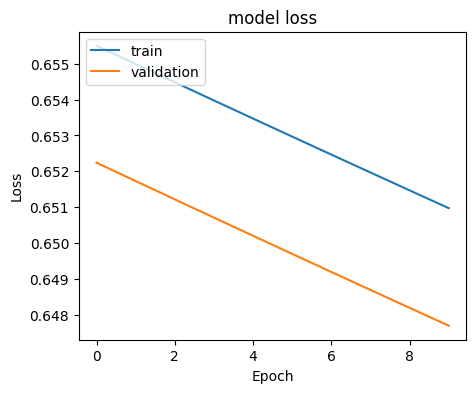

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.figure(figsize=(5,4))
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

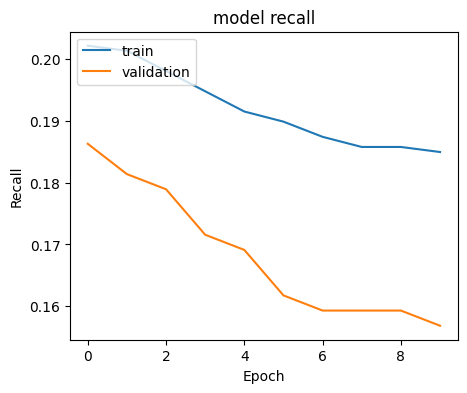

In [ ]:
#Plotting Train recall vs Validation recall
plt.figure(figsize=(5,4))
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [ ]:
#classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78      4778
         1.0       0.17      0.18      0.18      1222

    accuracy                           0.65      6000
   macro avg       0.48      0.48      0.48      6000
weighted avg       0.66      0.65      0.66      6000



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78      1592
         1.0       0.15      0.16      0.15       408

    accuracy                           0.65      2000
   macro avg       0.47      0.47      0.47      2000
weighted avg       0.65      0.65      0.65      2000



**Confusion matrix**

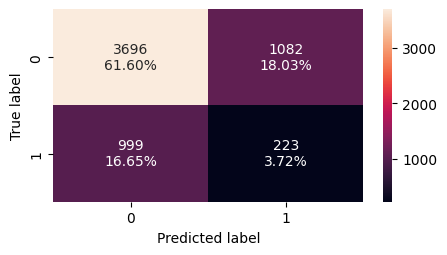

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

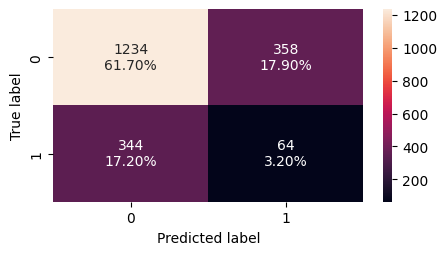

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

##Create a DataFrame where the results of Model and parameters will be stored

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["Optimizer","Dropout","SMOTE","# hidden layers","# neurons - hidden layer","activation function - hidden layer","# epochs","batch size","train loss","validation loss","train recall","validation recall","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

In [ ]:
results.loc[0] = ["SGD","-","-",1,128,'relu',10,6000,history_0.history["loss"][-1],history_0.history["val_loss"][-1],history_0.history["recall"][-1],history_0.history["val_recall"][-1],round(end-start,2)]

results

,Optimizer,Dropout,SMOTE,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train recall,validation recall,time (secs)
0,SGD,-,-,1,128,relu,10,6000,0.650972,0.647695,0.184943,0.156863,5.22


## Model Performance Improvement

**OPTIMIZER**

**SGD**: Updates weights using gradients; slower but can generalize better. Fixed learning rate unless adjusted manually. Often combined with momentum.

**Adam**: Combines momentum and RMSProp; adapts learning rates for faster convergence. Ideal for complex models but may overfit in some cases.

Adam is faster and more adaptive, while SGD is simpler and may generalize better.


**BATCH SIZE**

Determines the number of samples processed before the model updates its weights.

**Smaller batch sizes**: Provide more frequent updates, which can lead to faster convergence but noisier updates.

**Larger batch sizes**: Provide smoother updates but require more memory and may converge slower.



**EPOCH**

Defines the number of complete passes through the entire training dataset. More epochs allow the model to learn better but may lead to overfitting if the model trains for too long.


### Neural Network with Adam Optimizer

In [ ]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

model_1 = Sequential()
model_1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
model_1.add(Dense(32,activation='relu'))
model_1.add(Dense(1, activation = 'sigmoid')) #Sigmoid is for binary classification case. If multiple class use softmax

optimizer = tf.keras.optimizers.Adam()

metric = 'recall'
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         188,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 190,593 (744.50 KB)

 Trainable params: 190,593 (744.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
start = time.time()

history_1 = model_1.fit(
    X_train,y_train,
    batch_size=32,
    validation_data=(X_val,y_val),
    epochs=10,
    verbose=1
)

end = time.time()

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 9251.9229 - recall: 0.1984 - val_loss: 365.7553 - val_recall: 0.0000e+00
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5285.4463 - recall: 0.1962 - val_loss: 6388.0928 - val_recall: 0.0000e+00
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4631.9746 - recall: 0.1732 - val_loss: 3230.1394 - val_recall: 0.0000e+00
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3809.3250 - recall: 0.1857 - val_loss: 7718.1631 - val_recall: 0.0000e+00
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4383.8872 - recall: 0.1879 - val_loss: 2826.7134 - val_recall: 0.0000e+00
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2000.5852 - recall: 0.2040 - val_loss: 3410.5798 - val_recall: 0.0000e+00
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1998.9680 - recall: 0.2000 - val_loss: 2713.8181 - val_recall: 0.0000e+00
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21

**Loss function**

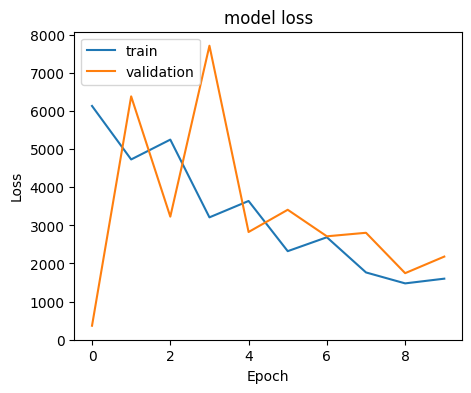

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.figure(figsize=(5,4))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

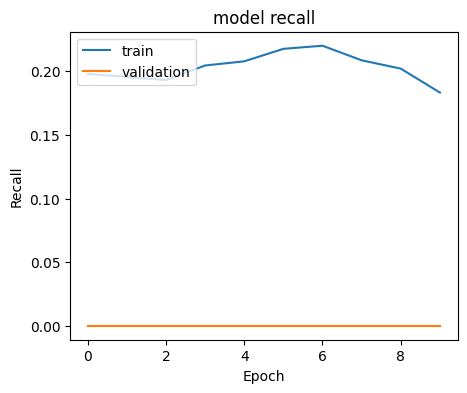

In [ ]:
#Plotting Train recall vs Validation recall
plt.figure(figsize=(5,4))
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      4778
         1.0       0.00      0.00      0.00      1222

    accuracy                           0.80      6000
   macro avg       0.40      0.50      0.44      6000
weighted avg       0.63      0.80      0.71      6000



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1592
         1.0       0.00      0.00      0.00       408

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



**Confusion matrix**

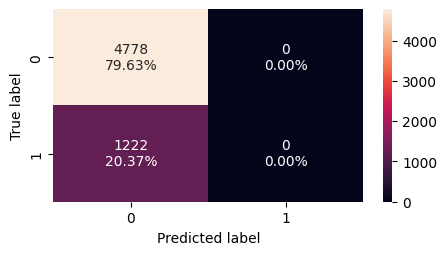

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

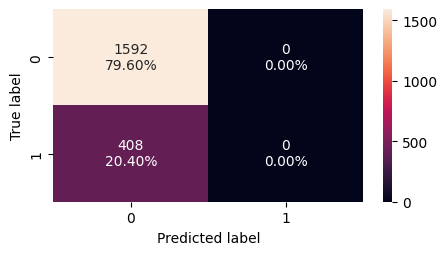

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

In [ ]:
results.loc[1] = ["Adam","-","-",1, 128,'relu',10,2000,history_1.history["loss"][-1],history_1.history["val_loss"][-1],history_1.history["recall"][-1],history_1.history["val_recall"][-1],round(end-start,2)]

results

,Optimizer,Dropout,SMOTE,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train recall,validation recall,time (secs)
0,SGD,-,-,1,128,relu,10,6000,0.692506,0.692419,0.000000,0.0,8.78
1,Adam,-,-,1,128,relu,10,2000,1601.326660,2181.099609,0.183306,0.0,12.21


### Neural Network with Adam Optimizer and Dropout

In [ ]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
model_2 = Sequential()
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
model_2.add(Dropout(0.2))
model_2.add(Dense(128,activation='relu'))
model_2.add(Dense(64,activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(32,activation='relu'))
model_2.add(Dense(num_classes, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam()
metric = 'recall'

model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │          94,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,833 (425.13 KB)

 Trainable params: 108,833 (425.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
start = time.time()
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,
    epochs=10,
    verbose=1,
    validation_data=(X_val,y_val)
)
end = time.time()

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 4816.9419 - recall: 0.2271 - val_loss: 52.8114 - val_recall: 0.0000e+00
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 36.6623 - recall: 0.1036 - val_loss: 0.5071 - val_recall: 0.0000e+00
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5051 - recall: 0.0000e+00 - val_loss: 0.5066 - val_recall: 0.0000e+00
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5043 - recall: 0.0000e+00 - val_loss: 0.5066 - val_recall: 0.0000e+00
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5038 - recall: 0.0000e+00 - val_loss: 0.5068 - val_recall: 0.0000e+00
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5043 - recall: 0.0000e+00 - val_loss: 0.5066 - val_recall: 0.0000e+00
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5022 - recall: 0.0000e+00 - val_loss: 0.5065 - val_recall: 0.0000e+00
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5018 - recall: 0

**Loss function**

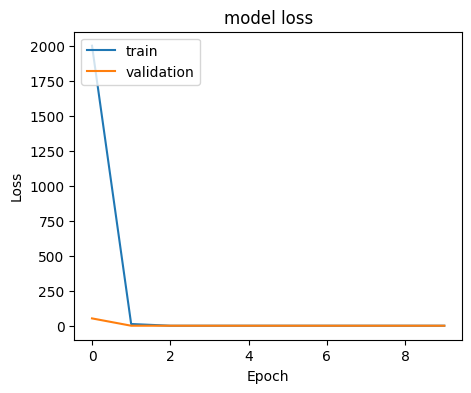

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

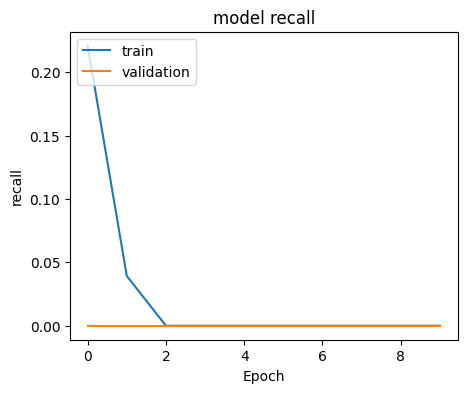

In [ ]:
#Plotting Train recall vs Validation recall
plt.figure(figsize=(5,4))
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      4778
         1.0       0.00      0.00      0.00      1222

    accuracy                           0.80      6000
   macro avg       0.40      0.50      0.44      6000
weighted avg       0.63      0.80      0.71      6000



In [ ]:
#classification report
cr = classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1592
         1.0       0.00      0.00      0.00       408

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



**Confusion matrix**

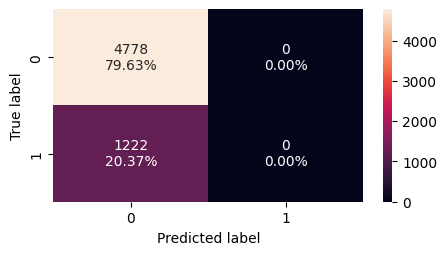

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

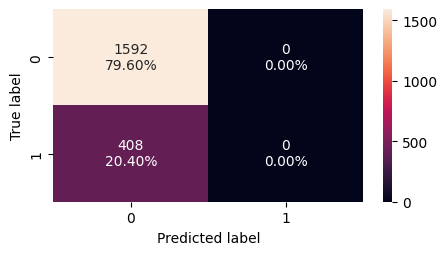

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

In [ ]:
results.loc[2] = ["Adam","[0.2,0.1]","-",3,'['+ str(256) +','+ str(128) +','+ str(64) +']','[relu,relu,relu]',100,32,history_2.history["loss"][-1],history_2.history["val_loss"][-1],history_2.history["recall"][-1],history_2.history["val_recall"][-1],round(end-start,2)]

results

,Optimizer,Dropout,SMOTE,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train recall,validation recall,time (secs)
0,SGD,-,-,1,128,relu,10,6000,0.692506,0.692419,0.000000,0.0,8.78
1,Adam,-,-,1,128,relu,10,2000,1601.326660,2181.099609,0.183306,0.0,12.21
2,Adam,"[0.2,0.1]",-,3,"[256,128,64]","[relu,relu,relu]",100,32,0.506967,0.506973,0.000000,0.0,16.67


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**SMOTE (Synthetic Minority Oversampling Technique)** is a method used to address class imbalance in datasets, especially in classification problems. It generates synthetic samples for the minority class to balance the dataset, rather than simply duplicating existing samples.

**How SMOTE works:**
Identify Minority Class: Focuses on the class with fewer samples.

*   Generate Synthetic Samples: Creates new samples by interpolating between existing ones of the minority class.
*   Balance the Dataset: Adds the synthetic samples to the dataset, improving class balance.

SMOTE is particularly useful in scenarios like fraud detection or medical diagnosis, where the minority class is critical.

In [ ]:
sm  = SMOTE(random_state=1)

X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (9556, 2944)
After UpSampling, the shape of train_y: (9556,) 



In [ ]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
model_3 = Sequential()
model_3.add(Dense(num_neuron_hl_5,activation='relu',input_dim = X_train_smote.shape[1]))
model_3.add(Dense(num_neuron_hl_4,activation='relu'))
model_3.add(Dense(num_neuron_hl_3,activation='relu'))
model_3.add(Dense(num_classes, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.SGD(0.001)
metric = 'recall'
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │          32,395 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,276 (137.80 KB)

 Trainable params: 35,276 (137.80 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
start = time.time()

history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data = (X_val,y_val)#,
    #callbacks=[early_stopping] #cancelled using early_stopping as stopping too early.
)

end = time.time()

Epoch 1/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 895371313152.0000 - recall: 0.5428 - val_loss: 0.6930 - val_recall: 0.0000e+00
Epoch 2/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6931 - recall: 0.3422 - val_loss: 0.6931 - val_recall: 0.0000e+00
Epoch 3/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6931 - recall: 0.3520 - val_loss: 0.6931 - val_recall: 0.0000e+00
Epoch 4/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6931 - recall: 0.3616 - val_loss: 0.6931 - val_recall: 0.0000e+00
Epoch 5/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6931 - recall: 0.3622 - val_loss: 0.6931 - val_recall: 0.0000e+00
Epoch 6/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6931 - recall: 0.3844 - val_loss: 0.6931 - val_recall: 0.0000e+00
Epoch 7/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6931 - recall: 0.3973 - val_loss: 0.6931 - val_recall: 0.0000e+00
Epoch 8/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6931 - recall: 0.3973 -

**Loss function**

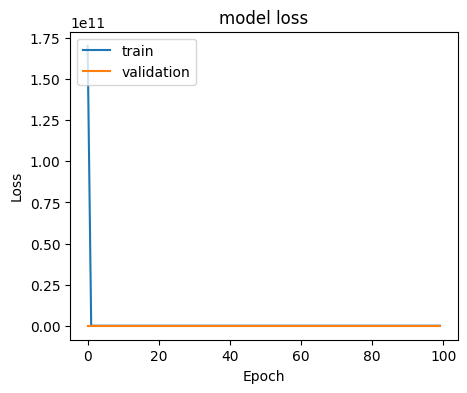

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.figure(figsize=(5,4))
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

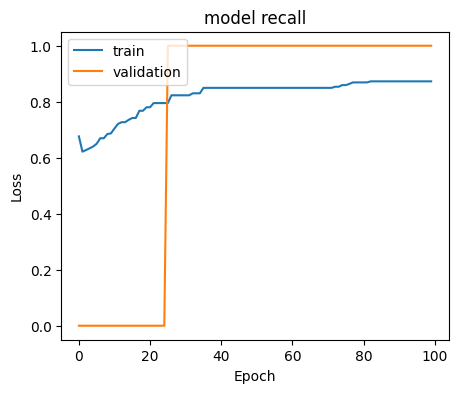

In [ ]:
#Plotting Train recall vs Validation recall
plt.figure(figsize=(5,4))
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      4778
         1.0       0.50      1.00      0.67      4778

    accuracy                           0.50      9556
   macro avg       0.25      0.50      0.33      9556
weighted avg       0.25      0.50      0.33      9556



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1592
         1.0       0.20      1.00      0.34       408

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.17      2000
weighted avg       0.04      0.20      0.07      2000



**Confusion matrix**

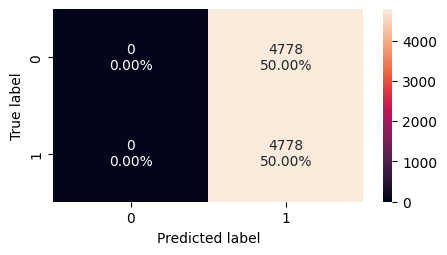

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

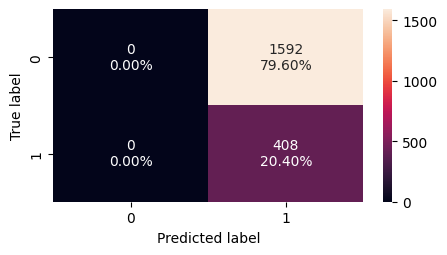

In [ ]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred)

In [ ]:
results.loc[3] = ["SGD","-","yes", 3,'['+ str(num_neuron_hl_5) +','+ str(num_neuron_hl_4) +','+ str(num_neuron_hl_3) +']','[relu,relu,relu]',epochs,batch_size,history_3.history["loss"][-1],history_3.history["val_loss"][-1],history_3.history["recall"][-1],history_3.history["val_recall"][-1],round(end-start,2)]

results

,Optimizer,Dropout,SMOTE,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train recall,validation recall,time (secs)
0,SGD,-,-,1,128,relu,10,6000,0.692506,0.692419,0.000000,0.0,8.78
1,Adam,-,-,1,128,relu,10,2000,1601.326660,2181.099609,0.183306,0.0,12.21
2,Adam,"[0.2,0.1]",-,3,"[256,128,64]","[relu,relu,relu]",100,32,0.506967,0.506973,0.000000,0.0,16.67
3,SGD,-,yes,3,"[11,64,32]","[relu,relu,relu]",100,32,0.693151,0.693166,0.872750,1.0,81.41


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

build a model with the balanced dataset

In [ ]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_4 = Sequential()
model_4.add(Dense(num_neuron_hl_5,activation='relu',input_dim = X_train_smote.shape[1]))
model_4.add(Dense(num_neuron_hl_4,activation='relu'))
model_4.add(Dense(num_neuron_hl_3,activation='relu'))
model_4.add(Dense(num_classes, activation = 'sigmoid'))
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │          32,395 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,276 (137.80 KB)

 Trainable params: 35,276 (137.80 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
metric = 'recall'
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │          32,395 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,276 (137.80 KB)

 Trainable params: 35,276 (137.80 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start = time.time()

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data = (X_val,y_val)
)

end = time.time()

Epoch 1/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1940.3057 - recall: 0.4844 - val_loss: 262.5698 - val_recall: 0.0000e+00
Epoch 2/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 176.4837 - recall: 0.4873 - val_loss: 14.8016 - val_recall: 0.0000e+00
Epoch 3/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 23.8822 - recall: 0.4895 - val_loss: 8.8848 - val_recall: 1.0000
Epoch 4/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7931 - recall: 0.5235 - val_loss: 1.5420 - val_recall: 1.0000
Epoch 5/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8923 - recall: 0.4958 - val_loss: 1.1315 - val_recall: 1.0000
Epoch 6/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8059 - recall: 0.5225 - val_loss: 0.8063 - val_recall: 1.0000
Epoch 7/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.6437 - recall: 0.8211 - val_loss: 0.6858 - val_recall: 0.0000e+00
Epoch 8/10
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6932 - recall: 0.2620 - val_loss: 0.6896 - val_r

**Loss function**

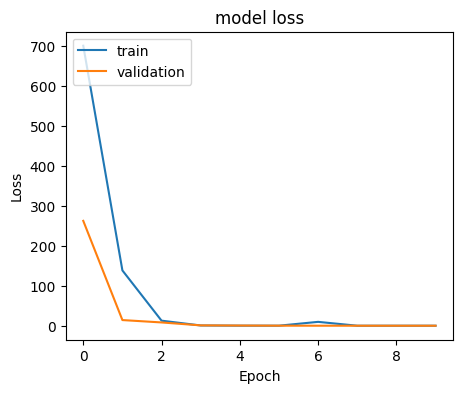

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.figure(figsize=(5,4))
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

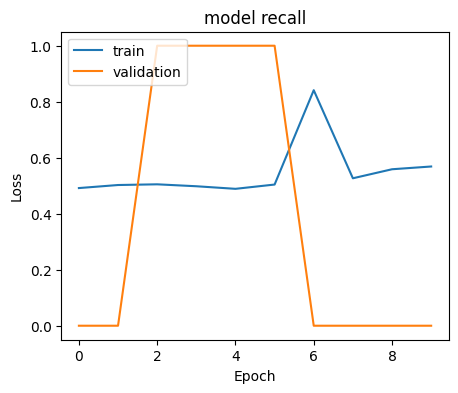

In [ ]:
#Plotting Train recall vs Validation recall
plt.figure(figsize=(5,4))
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      4778
         1.0       0.00      0.00      0.00      4778

    accuracy                           0.50      9556
   macro avg       0.25      0.50      0.33      9556
weighted avg       0.25      0.50      0.33      9556



In [ ]:
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1592
         1.0       0.00      0.00      0.00       408

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



**Confusion matrix**

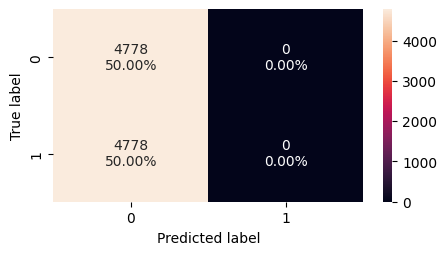

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

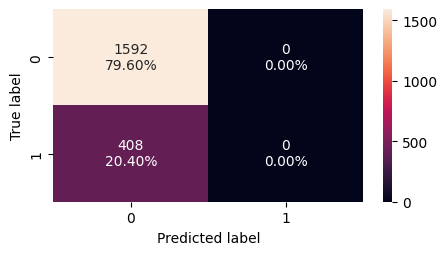

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

In [ ]:
results.loc[4] = ["Adam","-","yes",3,'['+ str(num_neuron_hl_5) +','+ str(num_neuron_hl_4) +','+ str(num_neuron_hl_3) +']','[relu,tanh,tanh]',epochs,batch_size,history_4.history["loss"][-1],history_4.history["val_loss"][-1],history_4.history["recall"][-1],history_4.history["val_recall"][-1],round(end-start,2)]

results

,Optimizer,Dropout,SMOTE,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train recall,validation recall,time (secs)
0,SGD,-,-,1,128,relu,10,6000,0.692506,0.692419,0.000000,0.0,8.78
1,Adam,-,-,1,128,relu,10,2000,1601.326660,2181.099609,0.183306,0.0,12.21
2,Adam,"[0.2,0.1]",-,3,"[256,128,64]","[relu,relu,relu]",100,32,0.506967,0.506973,0.000000,0.0,16.67
3,SGD,-,yes,3,"[11,64,32]","[relu,relu,relu]",100,32,0.693151,0.693166,0.872750,1.0,81.41
4,Adam,-,yes,3,"[11,64,32]","[relu,tanh,tanh]",10,32,0.693196,0.690444,0.568648,0.0,15.90


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
epochs = 50
batch_size = 32
num_neuron_input = 11
num_neuron_hl_1 = 128
num_classes = 1
dropout_rate_1 = 0.2
dropout_rate_2 = 0.2

X_train_smote.shape[1]

from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

# Learning rate scheduler function
def scheduler(epoch, lr):
  if epoch < 10:
    return float(lr)
  else:
    return float(lr * tf.math.exp(-0.1))

In [ ]:
model_5 = Sequential()
model_5.add(Dense(num_neuron_input,activation='relu',input_dim = X_train_smote.shape[1]))
model_5.add(Dropout(dropout_rate_1))
model_5.add(Dense(num_neuron_hl_1,activation='relu'))
model_5.add(Dropout(dropout_rate_2))
model_5.add(Dense(8,activation='relu'))
model_5.add(Dense(num_classes, activation = 'sigmoid'))
optimizer = tf.keras.optimizers.Adam()
metric = 'recall'
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │           1,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,709 (10.58 KB)

 Trainable params: 2,709 (10.58 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.0001)
lr_scheduler = LearningRateScheduler(scheduler)

start = time.time()
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data = (X_val,y_val)#,
    #callbacks=[early_stopping, reduce_lr,lr_scheduler]
    )
end = time.time()

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6461 - recall: 0.4974 - val_loss: 0.5449 - val_recall: 0.7108
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5850 - recall: 0.7261 - val_loss: 0.5311 - val_recall: 0.6985
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5585 - recall: 0.7375 - val_loss: 0.5353 - val_recall: 0.6985
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5564 - recall: 0.7218 - val_loss: 0.5284 - val_recall: 0.6789
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5399 - recall: 0.7196 - val_loss: 0.5292 - val_recall: 0.6814
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5336 - recall: 0.7067 - val_loss: 0.5266 - val_recall: 0.6593
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5312 - recall: 0.7108 - val_loss: 0.5286 - val_recall: 0.6936
Epoch 8/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5166 - recall: 0.7223 - val_loss: 0.5119 - val_recall: 0.6863
Epoch 9/

**Loss function**

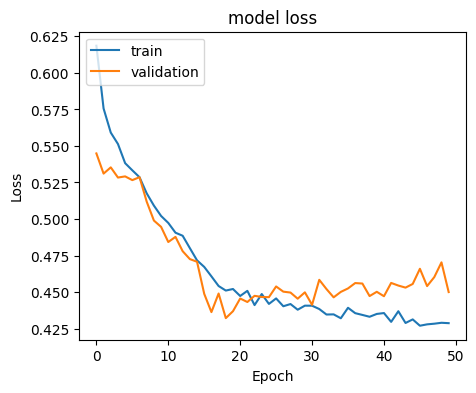

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.figure(figsize=(5,4))
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

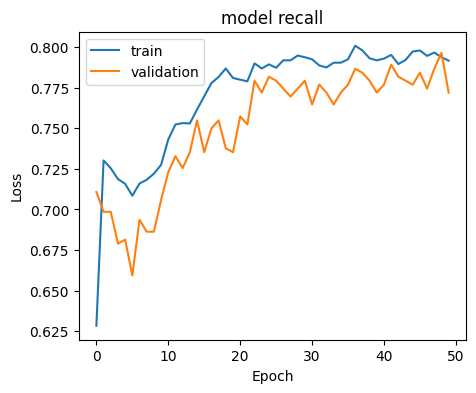

In [ ]:
#Plotting Train recall vs Validation recall
plt.figure(figsize=(5,4))
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [ ]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.79      0.82      4778
         1.0       0.80      0.85      0.83      4778

    accuracy                           0.82      9556
   macro avg       0.82      0.82      0.82      9556
weighted avg       0.82      0.82      0.82      9556



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      1592
         1.0       0.50      0.77      0.61       408

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.73      2000
weighted avg       0.84      0.80      0.81      2000



**Confusion matrix**

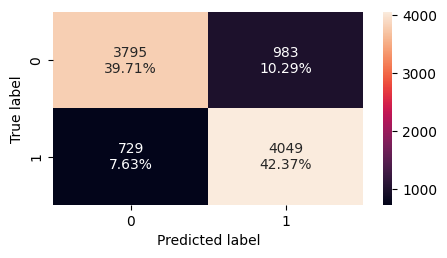

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

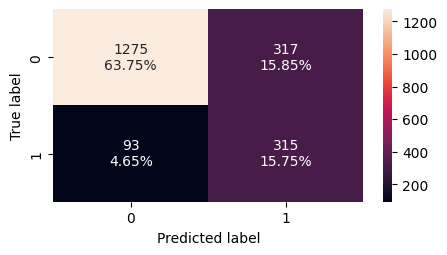

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

In [ ]:
results.loc[5] = ["Adam","[0.2,0.1]","yes",3,'['+ str(num_neuron_input) +','+ str(num_neuron_hl_1) +',8]','[relu,relu,relu]',epochs,batch_size,history_5.history["loss"][-1],history_5.history["val_loss"][-1],history_5.history["recall"][-1],history_5.history["val_recall"][-1],round(end-start,2)]

results

,Optimizer,Dropout,SMOTE,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train recall,validation recall,time (secs)
0,SGD,-,-,1,128,relu,10,6000,0.650972,0.647695,0.184943,0.156863,5.22
5,Adam,"[0.2,0.1]",yes,3,"[11,128,8]","[relu,relu,relu]",50,32,0.428730,0.450014,0.791754,0.772059,54.27


## Model Performance Comparison and Final Model Selection

In [ ]:
results

,Optimizer,Dropout,SMOTE,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train recall,validation recall,time (secs)
0,SGD,-,-,1,128,relu,10,6000,0.650972,0.647695,0.184943,0.156863,5.22
5,Adam,"[0.2,0.1]",yes,3,"[11,128,8]","[relu,relu,relu]",50,32,0.428730,0.450014,0.791754,0.772059,54.27


In [ ]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.182488
"NN with SMOTE,Adam & Dropout",0.847426


In [ ]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.156863
"NN with SMOTE,Adam & Dropout",0.772059


In [ ]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.025625
"NN with SMOTE,Adam & Dropout",0.075367


In [ ]:
y_test_pred = model_5.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.85      1593
         1.0       0.47      0.74      0.57       407

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



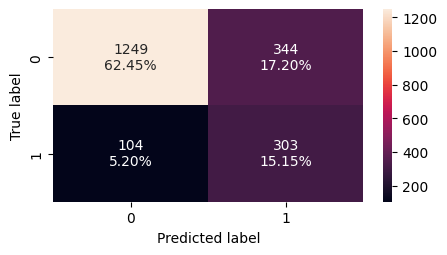

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

### Features Importance

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Custom scoring function using accuracy
def custom_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    y_pred = np.round(y_pred)  # Round the predictions to get binary output
    return accuracy_score(y, y_pred)

# Assuming model_5 is your trained neural network model
result_imp = permutation_importance(model_5, X_val, y_val, scoring=custom_scorer, n_repeats=10, random_state=1)
importance = result_imp.importances_mean

# Print feature importance
for i, v in enumerate(importance):
    print(f'Feature: {X_train.columns[i]}, Score: {v:.2f}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━

## Further Model Improvement (Manual trial and error)

In [ ]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["Optimizer","Dropout","SMOTE","# hidden layers","# neurons - hidden layer","activation function - hidden layer","# epochs","batch size","train loss","validation loss","train recall","validation recall","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

In [ ]:
sm  = SMOTE(random_state=1)

X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (9556, 11)
After UpSampling, the shape of train_y: (9556,) 



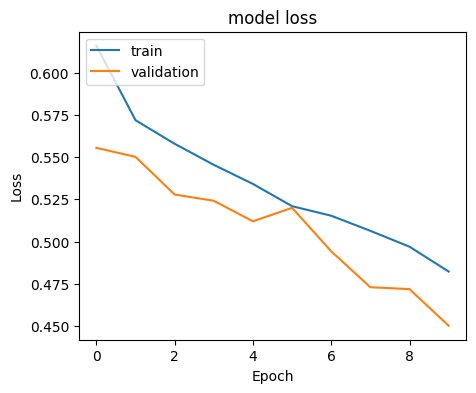

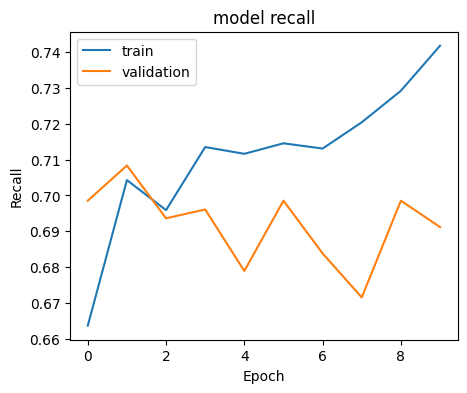

,Optimizer,Dropout,SMOTE,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,train loss,validation loss,train recall,validation recall,time (secs)
0,Adam,"[0.2,0.2,0]",YES,2,"[16/128,8,0]",relu,50,32,0.408654,0.419239,0.816450,0.725490,39.60
1,Adam,"[0.2,0.2,0.1]",YES,3,"[16/128,16,8]",relu,50,32,0.410831,0.394293,0.809962,0.715686,58.32
2,Adam,"[0.2,0.2,0.2]",YES,3,"[16/128,64,32]",relu,50,32,0.413493,0.409073,0.816032,0.742647,63.43
3,Adam,"[0.2,0.2,0.2]",YES,3,"[16/128,64,32]",relu,150,32,0.416102,0.428592,0.801800,0.757353,148.28
4,Adam,"[0.25,0.25,0.25]",YES,3,"[16/128,64,32]",relu,50,32,0.426081,0.445017,0.788405,0.757353,49.23
5,Adam,"[0.25,0.25,0.25]",YES,3,"[16/128,64,32]",relu,50,32,0.428520,0.442143,0.803893,0.764706,55.89
6,Adam,"[0.15,0.15,0.15]",YES,3,"[16/128,64,32]",relu,50,32,0.397314,0.417482,0.821683,0.752451,69.53
7,Adam,"[0.1,0.1,0.1]",YES,3,"[16/128,64,32]",relu,50,32,0.377864,0.433130,0.840519,0.740196,51.81
8,Adam,"[0.1,0.1,0.1]",YES,3,"[16/128,64,32]",relu,50,32,0.377864,0.433130,0.840519,0.740196,51.16
9,Adam,"[0.2,0.2,0.2]",YES,3,"[16/128,64,32]",relu,50,32,0.420213,0.434353,0.809334,0.762255,57.57


In [ ]:
num_epoch = 10
batch_size = 32
num_hdn_lyr = 3
num_neuron_input = 16
num_neuron_hl_1 = 128
num_neuron_hl_2 = 64
num_neuron_hl_3 = 32
learning_rate = 0.001
dropout_rate_1 = 0.2
dropout_rate_2 = 0.15
dropout_rate_3 = 0.1

backend.clear_session()
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2,l1,l2
from keras.layers import LeakyReLU

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Standardizing the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train_smote)
#X_val_scaled = scaler.transform(X_val)

# Model Architecture
model_6 = Sequential()
model_6.add(Dense(num_neuron_input, activation='relu'))
#model_6.add(Dense(num_neuron_input))
#model_6.add(LeakyReLU(alpha=0.05))
#model_6.add(BatchNormalization())
model_6.add(Dropout(dropout_rate_1))

# Hidden Layer 1
model_6.add(Dense(num_neuron_hl_1, activation='relu'))
#model_6.add(Dense(num_neuron_hl_1))
#model_6.add(LeakyReLU(alpha=0.05))
#model_6.add(BatchNormalization())
#model_6.add(Dropout(dropout_rate_2))

# Hidden Layer 2
model_6.add(Dense(num_neuron_hl_2, activation='relu'))
#model_6.add(Dense(num_neuron_hl_2))
#model_6.add(LeakyReLU(alpha=0.05))
#model_6.add(BatchNormalization())
model_6.add(Dropout(dropout_rate_3))

# Hidden Layer 3
model_6.add(Dense(num_neuron_hl_3, activation='relu'))
#model_6.add(Dense(num_neuron_hl_3))
#model_6.add(LeakyReLU(alpha=0.05))
#model_6.add(BatchNormalization())

#Output layer
model_6.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate)
metric = 'recall'
model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

start = time.time()
history_6 = model_6.fit(
    X_train_smote, y_train_smote,
    batch_size=batch_size,
    epochs=num_epoch,
    verbose=0,
    validation_data=(X_val, y_val)
    , callbacks=[reduce_lr]
)
end = time.time()


#Plotting Train Loss vs Validation Loss
plt.figure(figsize=(5,4))
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#Plotting Train recall vs Validation recall
plt.figure(figsize=(5,4))
plt.plot(history_6.history['recall'])
plt.plot(history_6.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

results.loc[len(results)] = ["Adam","[" + str(dropout_rate_1) + "," + str(dropout_rate_2) + "," + str(dropout_rate_3)  + "]","YES",num_hdn_lyr, "[" + str(num_neuron_input) + "/" + str(num_neuron_hl_1) + "," + str(num_neuron_hl_2)  + "," + str(num_neuron_hl_3) + "]",'relu',num_epoch,batch_size,history_6.history["loss"][-1],history_6.history["val_loss"][-1],history_6.history["recall"][-1],history_6.history["val_recall"][-1],round(end-start,2)]

results

## Automate Model Improvement using GridSearch

By automating the hyperparameter resting, we can try to find the best combination to achieve the best recall

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to create the model
def create_model(Num_Hidden_Layer_1=64, Num_Hidden_Layer_2=32, Num_Hidden_Layer_3=16,
                 Dropout_Rate_1=0.2, Dropout_Rate_2=0.2, Dropout_Rate_3=0.2):
    model = Sequential()
    model.add(Dense(11, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(Num_Hidden_Layer_1, activation='relu'))
    model.add(Dropout(Dropout_Rate_1))
    model.add(Dense(Num_Hidden_Layer_2, activation='relu'))
    model.add(Dropout(Dropout_Rate_2))
    model.add(Dense(Num_Hidden_Layer_3, activation='relu'))
    model.add(Dropout(Dropout_Rate_3))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['recall'])
    return model

# Wrap the model in KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'batch_size': [16, 32, 64, 128],
    'epochs': [10, 20],
    'Num_Hidden_Layer_1': [64, 128],
    'Num_Hidden_Layer_2': [32, 64],
    'Num_Hidden_Layer_3': [16, 32],
    'Dropout_Rate_1': [0.2, 0.3],
    'Dropout_Rate_2': [0.2, 0.3],
    'Dropout_Rate_3': [0.2, 0.3]
}

# Perform GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='recall', cv=3)
grid_result = grid.fit(X_train_scaled, y_train_smote)

# Print the best parameters and recall score
print("Best parameters found: ", grid_result.best_params_)
print("Best recall score: ", grid_result.best_score_)


## Possible Further Improvement to Get a better Recall Score

1. Adjust Class Weights:
Assign higher weights to the minority class to reduce false negatives.

In [ ]:
class_weights = {0: 1.0, 1: 3.0}  # Example: Weight the minority class more heavily
history_grid = model_grid.fit(
    X_train_scaled, y_train_smote,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, reduce_lr, lr_scheduler],
    class_weight=class_weights
)

2. Lower Decision Threshold:
Change the threshold for classifying positive samples to improve recall.

In [ ]:
y_pred = (model_grid.predict(X_val_scaled) > 0.3).astype(int)  # Lower threshold from 0.5 to 0.3

3. Add Regularization:
Include techniques like BatchNormalization or L2 Regularization to improve generalization.

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model_grid.add(BatchNormalization())


4. Optimize Hyperparameters:
Use GridSearchCV or RandomizedSearchCV to find the best combination of hyperparameters, as shown in the previous example.

5. Increase Model Complexity:
Add more hidden layers or neurons to capture complex patterns in the data.

In [ ]:
model_grid.add(Dense(Num_Hidden_Layer_4, activation='relu'))
model_grid.add(Dropout(Dropout_Rate_4))


6. Use Advanced Optimizers:
Experiment with optimizers like RMSProp or Nadam for better convergence.

7. Data Augmentation:
Use techniques like SMOTE to further balance the dataset and improve recall.

8. Monitor Recall Directly:
Use recall as the primary metric during training.

In [ ]:
model_grid.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['Recall'])
